In [1]:
from tracking import PeopleTracker
import csv
import time
import matplotlib.pyplot as plt
import math
import os

track = PeopleTracker(debug = False)
class Detection:
    def __init__(self, x: float, y: float, orientation: float):
        self.x = x
        self.y = y
        self.orientation = orientation


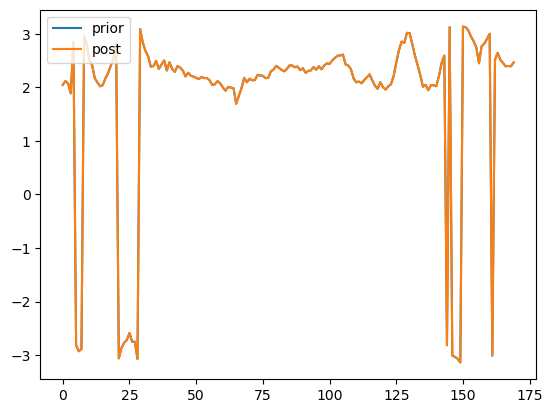

Processed 293 lines.


In [2]:
import matplotlib.pyplot as plt
with open('./SanityCheck.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    ID = 0
    detections = []
    timestamp = 0
    predictNum = 0

    person1x_prior=[]
    person1y_prior=[]
    person1theta_prior=[]
    person1x_post=[]
    person1y_post=[]
    person1theta_post=[]

    for row in csv_reader:
        # print(f"Row ID: {row[0]}, x: {row[2]}, y: {row[3]}, theta: {row[4]} - length of detections is {len(detections)}")
        if line_count == 0:
            #print(f'Column names are {", ".join(row)}')
            line_count += 1
        
        elif int(row[0]) == ID or len(detections) == 0:
            detections.append(Detection(float(row[2]), float(row[3]), float(row[4])))
            timestamp = float(row[1])
            line_count += 1
            ID = int(row[0])
        else:
            if predictNum:
                track.predict()

            if len(detections):
                track.update(detections,timestamp)
                if len(track.personList):
                    person1x_prior.append(float(track.personList[0].measX))
                    person1x_post.append(float(track.personList[0].personX))
                    person1y_prior.append(float(track.personList[0].measY))
                    person1y_post.append(float(track.personList[0].personY_prior))
                    person1theta_prior.append(float(track.personList[0].measTheta))
                    person1theta_post.append(float(track.personList[0].personTheta))
        # else:
        #     if predictNum:
        #         track.predict()
        #         for person in track.personList:
        #             plt.arrow(float(person.personX_prior), float(person.personY_prior), math.cos(float(person.personTheta_prior)), math.sin(float(person.personTheta_prior)),
        #                 head_width = 0.05,
        #                 width = 0.01,
        #                 ec ='red')

        #     if len(detections):
        #         track.update(detections, timestamp)
                
        #         for detection in detections:
        #             plt.arrow(float(detection.x), float(detection.y), math.cos(float(detection.orientation)), math.sin(float(detection.orientation)),
        #                 head_width = 0.05,
        #                 width = 0.01,
        #                 ec ='blue')
                    
                detections = []
        #         for person in track.personList:
        #             plt.arrow(float(person.personX), float(person.personY), math.cos(float(person.personTheta)), math.sin(float(person.personTheta)),
        #                 head_width = 0.05,
        #                 width = 0.01,
        #                 ec ='green')
        #         #plt.show()
        #         plt.axis([0, 3, -1.5, 1.5])
        #         plt.savefig(f"./images/{ID}.jpg")
        #         plt.clf()
        #         # time.sleep(1)

            detections.append(Detection(float(row[2]), float(row[3]), float(row[4])))
            timestamp = float(row[1])
            line_count += 1
            predictNum += 1
            ID = int(row[0])
    plt.plot(person1x_prior,label="prior")
    plt.plot(person1x_post,label="post")

    plt.legend(loc="upper left")
    plt.show()
    plt.plot(person1y_prior,label="prior")
    plt.plot(person1y_post,label="post")

    plt.legend(loc="upper left")
    plt.show()
    plt.plot(person1theta_prior,label="prior")
    plt.plot(person1theta_post,label="post")
    plt.legend(loc="upper left")
    plt.show()
    
    
    print(f'Processed {line_count} lines.')

    

In [3]:
import cv2
import numpy as np
import os

# assign directory
directory = 'images'

width = 640
height = 480

# choose codec according to format needed
fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
video = cv2.VideoWriter('video1.avi', fourcc, 5, (width, height))

files = []
# iterate over files in directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        files.append(f)

files.sort()

for file in range(0, 170):
    img = cv2.imread(f"./images/{file}.jpg")
    video.write(img)
cv2.destroyAllWindows()
video.release()